### Ejercicio 5.1: Orden de convergencia del método de Newton-Raphson

Consideremos la función $f(x)$ cuya derivada $f'(x)$ también es conocida. Nuestro objetivo es encontrar un valor $x = x^*$ tal que $f(x^*) = 0.0$.

El método de Newton-Raphson para la estimación del cero consiste en la siguiente iteración, comenzando desde $x_0$ (semilla inicial, dada):
$$
x_n = x_{n-1} - \frac{f(x_{n-1})}{f'(x_{n-1})}, \quad n = 1, 2, \ldots
$$

De esta forma, se obtiene la secuencia $x_0, x_1, \ldots, x_n, \ldots$, que se espera que converja en el límite cuando $n$ tiende a infinito:
$$
\lim_{n \rightarrow \infty} x_n = x^*.
$$

El algoritmo se basa en la siguiente estrategia:

- Considerar $x_{n-1}$ como la estimación de $x^*$ en la iteración $n-1$ del algoritmo.
- Asumiendo que estamos cerca de la convergencia, podemos mejorar la aproximación de $x^*$ encontrando el cero de la tangente de $f(x)$ en $x = x_{n-1}$. La fórmula de la tangente es:
$$
t(x) = f(x_{n-1}) + f'(x_{n-1}) \left(x - x_{n-1}\right).
$$

Definimos $x_n$ como el valor de $x$ tal que $t(x_n) = 0$:
$$
f(x_{n-1}) + f'(x_{n-1}) \left(x_n - x_{n-1}\right) = 0
\quad \Longrightarrow \quad x_n = x_{n-1} - \frac{f(x_{n-1})}{f'(x_{n-1})}.
$$

#### Preguntas:

1. ¿El algoritmo garantiza encontrar un cero? (convergencia global).
2. ¿El algoritmo garantiza encontrar un cero que esté suficientemente cerca de la semilla? (convergencia local).
3. Determina el orden de convergencia **local** (es decir, el valor de $\alpha$) de este algoritmo.
4. Proporciona una ilustración gráfica del orden de convergencia para la función $f(x) = e^{-x} - x$.
5. Teniendo en cuenta los errores de redondeo, ¿cuál es el valor más pequeño (orden de magnitud) del **error relativo** $\left(\frac{e_n}{x_n} \right)$ que podemos esperar alcanzar?


In [65]:
import numpy as np
import matplotlib.pyplot as plt

## SOLUCIÓN 1 ###

La **convergencia global** implicaría que el método siempre converge a una raíz **sin importar** la elección de la semilla inicial \$x\_0\$. Sin embargo, esto **no sucede** en Newton-Raphson. <span style="background-color:yellow">El método **puede fallar** por varias razones **si el punto de partida no es adecuado.**</span>  

<u>**Posibles fallos del algoritmo**</u>

1. **División por cero**: Si en algún paso \$f'(x\_n) = 0\$, la fórmula se vuelve indefinida. (Convexidad)
2. **Divergencia**: En vez de acercarse a una raíz, la secuencia puede alejarse o entrar en ciclos.
3. **Saltos abruptos**: Si \$f'\$ es muy grande o muy pequeño, el siguiente punto \$x\_{n+1}\$ puede alejarse drásticamente de la raíz.
4. **Raíces múltiples**: En el caso de raíces múltiples, la convergencia puede ser muy lenta o fallar si no se hace una modificación adecuada del método.

## SOLUCIÓN 2 ###

**Sí**, el método de Newton-Raphson **sí garantiza convergencia local** **bajo ciertas condiciones**.
  
Para que el método converja localmente, se deben cumplir estas condiciones:

1. **\$f(x)\$ es continua y derivable** en un entorno alrededor de \$x^\*\$.
2. **\$f'(x^\*) \ne 0\$**, es decir, la derivada en la raíz no se anula.
3. **\$x\_0\$ está lo suficientemente cerca de \$x^\*\$**.

## SOLUCIÓN 3 ###

- Decimos que una sucesión \${x\_n}\$ converge a \$x^\*\$ con orden \$\alpha\$ si existe una constante \$C > 0\$ tal que:

$$
\lim_{n \to \infty} \frac{|x_{n+1} - x^*|}{|x_n - x^*|^\alpha} = C
$$

- Recordemos que $f(x^*) = 0$, ya que $x^*$ es raíz. Usamos expansión de Taylor hasta segundo orden:

$$
f(x_n) = f'(x^*)(x_n - x^*) + \frac{1}{2}f''(x^*)(x_n - x^*)^2 + \cdots
$$

Es decir,

$$
f(x_n) = f'(x^*) e_n + \frac{1}{2} f''(x^*) e_n^2 + \cdots
$$

donde $e_n = x_n - x^*$.  

- También expandimos la derivada en $x_n$

$$
f'(x_n) = f'(x^*) + f''(x^*) e_n + \cdots
$$  

- Fórmula de Newton-Raphson

$$
x_{n+1} = x_n - \frac{f(x_n)}{f'(x_n)}
$$

Sustituimos $x_n = x^* + e_n$:

$$
x_{n+1} = x_n - \frac{f'(x^*) e_n + \frac{1}{2} f''(x^*) e_n^2 + \cdots}{f'(x^*) + f''(x^*) e_n + \cdots}  
$$  

- Si expandimos este cociente en series para pequeños $e_n$, usando el truco de aproximar fracciones:

$$
\frac{A + B e_n^2}{C + D e_n} \approx \frac{A}{C} + \left( \frac{B C - A D}{C^2} \right) e_n + \cdots
$$

- Aplicamos esa idea para simplificar:

$$
x_{n+1} = x_n - e_n + \frac{f''(x^*)}{2f'(x^*)} e_n^2 + \cdots
$$

- Recordando que $x_n = x^* + e_n$, entonces:

$$
x_{n+1} = x^* + e_n - e_n + \frac{f''(x^*)}{2f'(x^*)} e_n^2 + \cdots
$$

**Obtenemos el nuevo error**

$$
e_{n+1} = x_{n+1} - x^* = \frac{f''(x^*)}{2f'(x^*)} e_n^2 + \cdots
$$

**Hemos demostrado que:**

$$
e_{n+1} \approx C e_n^2 \quad \text{con} \quad C = \frac{f''(x^*)}{2f'(x^*)}
$$

Esto implica que **el orden de convergencia local del método de Newton-Raphson es cuadrático**, es decir, <span style="background-color:yellow">**α = 2**. </span>


## SOLUCIÓN 4 ##

Sea $f(x) = e^{-x} - x$

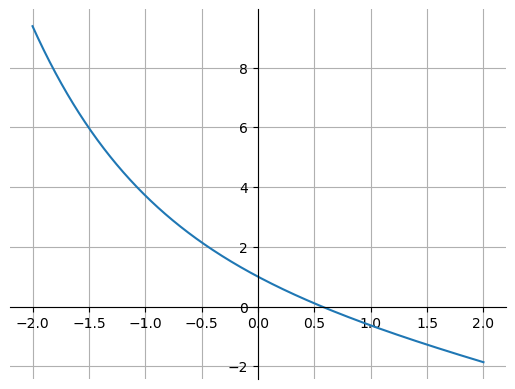

In [66]:
#### Definimos la función ####
def f(x):
    return (np.exp(-x))-x
#############################

x=np.linspace(-2,2,1000) # -2≤x≤2 (1000 números)
y=f(x) # La función
fig = plt.figure()  ## lienzo vacío
ax = fig.add_subplot(1, 1, 1)
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
plt.plot(x,y)
plt.grid()
plt.show()

In [67]:
from sympy import *

# Definir el símbolo y la función
x = symbols('x')
expr = exp(-x) - x
dydx = diff(expr, x) ## Calcula su derivada

print(f"f(x) = {expr}")
print(f"f'(x) = {dydx}")

f(x) = -x + exp(-x)
f'(x) = -1 - exp(-x)


In [68]:
f_x0 = lambdify(x, expr, modules='numpy')  # Convierte expr a función numérica
df_x0 = lambdify(x, dydx, modules='numpy')  # Convierte expr a función numérica
print(f"f(-0.5)={f_x0(-0.5)}") ## f(x=0.5)
print(f"f'(-0.5)={df_x0(-0.5)}")  ## f'(x=0.5)

f(-0.5)=2.148721270700128
f'(-0.5)=-2.648721270700128


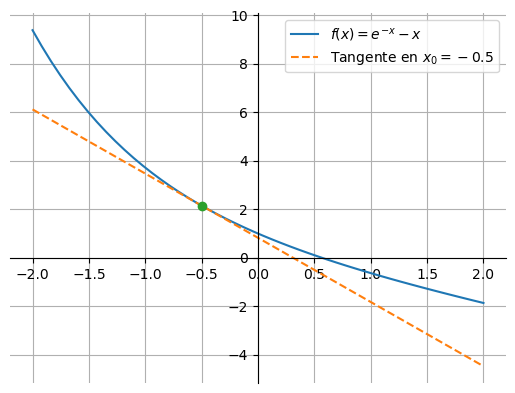

In [69]:
x=np.linspace(-2,2,50) # 50 números
y=f(x)
x0=-0.5
fig = plt.figure()  ## lienzo vacío
ax = fig.add_subplot(1, 1, 1)
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
y1=f_x0(x0)+df_x0(x0)*(x-x0)
plt.plot(x,y,label=r"$f(x) = e^{-x} - x$")
plt.plot(x,y1, label=f"Tangente en $x_0 = {x0}$", linestyle='--')
plt.plot(x0,f(x0),'o')
plt.grid()
plt.legend() 
plt.show()

In [70]:
#### Definimos la función método de Newton-Raphson ####
def newton_rap(f, df, x_n, x_vals):
    y_n = f(x_n)
    slope = df(x_n)
    # Tangente como función evaluada en los puntos x_vals
    tangent = y_n + slope * (x_vals - x_n)
    # Próxima aproximación
    x_next = x_n - y_n / slope
    return x_next, tangent
#######################################################

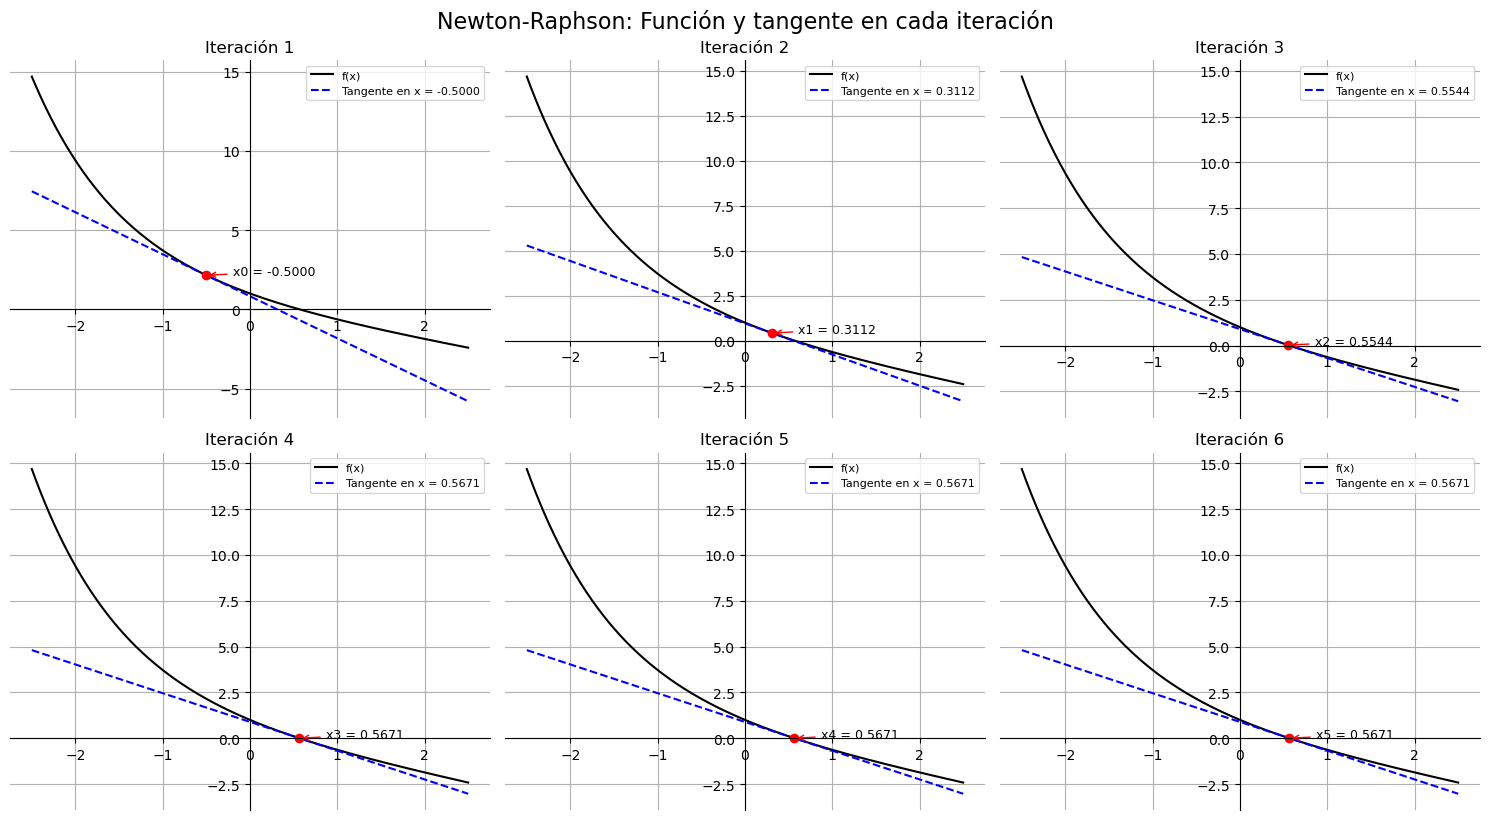

In [71]:
# definición simbólica
x_sym = symbols('x') ## La variable X
f_expr = exp(-x_sym) - x_sym  # expresion f(x)
df_expr = diff(f_expr, x_sym) # expresion f'(x)

# versión numérica
f = lambdify(x_sym, f_expr, modules='numpy') ## preparado para f(x0)
df = lambdify(x_sym, df_expr, modules='numpy') ## preparado para df(x0)

# valores para graficar
x = np.linspace(-2.5, 2.5, 400)
y= f(x)
x0 = -0.5  # Semilla inicial
iters = 6   # Cantidad de iteraciones (tangentes)

# Crear figura con 3 columnas y 2 filas
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 8))

# Recorrer las 6 iteraciones
for i in range(iters):
    row = i // 3
    col = i % 3
    ax = axes[row, col]

    # Evaluar Newton-Raphson
    x1, tangent = newton_rap(f, df, x0, x)

    # Graficar función y tangente
    ax.plot(x, y, label='f(x)', color='black')
    ax.plot(x, tangent, label=f'Tangente en x = {x0:.4f}', linestyle='--', color='blue')

    # Marcar el punto actual
    ax.plot(x0, f(x0), 'ro')
    ax.annotate(f"x{i} = {x0:.4f}", xy=(x0, f(x0)), xytext=(x0+0.3, f(x0)),
                arrowprops=dict(arrowstyle='->', color='red'), fontsize=9)

    # Ejes estilo cartesiano
    ax.spines['left'].set_position('center')
    ax.spines['bottom'].set_position('zero')
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')

    ax.set_title(f"Iteración {i+1}")
    ax.legend(fontsize=8)
    ax.grid(True)

    # Actualizar semilla
    x0 = x1

# Ajustar espacio
plt.tight_layout()
plt.suptitle("Newton-Raphson: Función y tangente en cada iteración", fontsize=16, y=1.02)
plt.show()

In [72]:
print(f"Ultimo valor de x0 = {x0}")

Ultimo valor de x0 = 0.5671432904097838


**Una ilustración gráfica del orden de convergencia** del método de Newton-Raphson **para la función**:

$$
f(x) = e^{-x} - x
$$

- Visualizar el **orden de convergencia**:

$$
\log_{10}(e_{n+1}) \text{ vs } \log_{10}(e_n)
$$

Donde:

* $e_n = |x_n - x^*|$ es el **error absoluto** en la iteración $n$
* Si la gráfica es aproximadamente una línea recta con pendiente $\alpha$, entonces $\alpha$ es el **orden de convergencia** por:
  $$
    e_{n+1} \approx C e_n^2 \quad \text{con} \quad C = \frac{f''(x^*)}{2f'(x^*)}
  $$

* En Newton-Raphson esperamos una **pendiente de 2**, porque es **convergencia cuadrática**

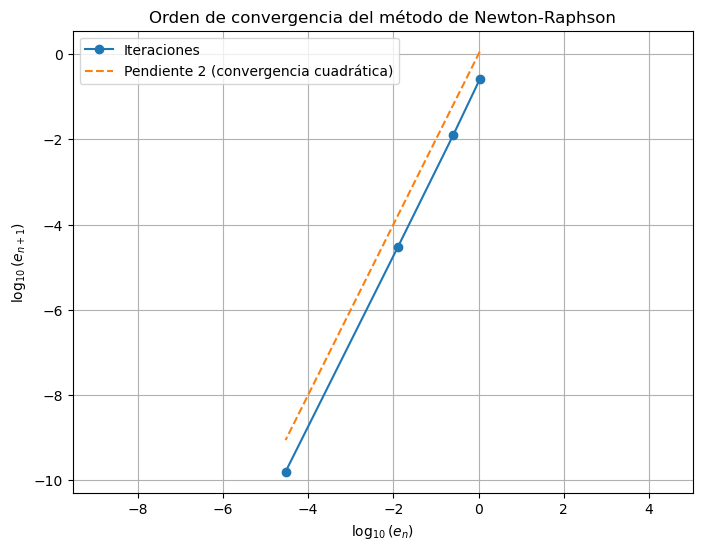

In [73]:
# Método de Newton-Raphson y registro de errores
def newton_raphson_errors(f, df, x0, max_iter=10, tol=1e-15):
    x_vals = [x0]
    for _ in range(max_iter):
        x_n = x_vals[-1]
        fx = f(x_n)
        dfx = df(x_n)
        x_next = x_n - fx / dfx
        x_vals.append(x_next)
        if abs(x_next - x_n) < tol:
            break
    return x_vals

# Obtener sucesivas aproximaciones
x0 = -0.5
x_list = newton_raphson_errors(f, df, x0, max_iter=10)

# Estimar raíz verdadera (último valor)
x_star = x_list[-1]

# Calcular errores
errors = [abs(x - x_star) for x in x_list]

# Eliminar errores que sean 0 (para evitar log10(0))
errors_filtered = [e for e in errors if e > 0]

# Logaritmos
log_en  = np.log10(errors_filtered[:-1])
log_en1 = np.log10(errors_filtered[1:])

# Graficar
plt.figure(figsize=(8,6))
plt.plot(log_en, log_en1, 'o-', label='Iteraciones')
plt.plot(log_en, 2*log_en, '--', label='Pendiente 2 (convergencia cuadrática)')
plt.xlabel(r'$\log_{10}(e_n)$')
plt.ylabel(r'$\log_{10}(e_{n+1})$')
plt.title("Orden de convergencia del método de Newton-Raphson")
plt.grid(True)
plt.legend()
plt.axis('equal')
plt.show()


**¿Qué muestra esta gráfica?**

* Cada punto representa un par $(e_n, e_{n+1})$ en escala logarítmica
* La línea punteada muestra la relación ideal de pendiente 2
* Los puntos reales se alinean bien con esa línea

## SOLUCIÓN 5 ##

En aritmética de **doble precisión (float64 en NumPy)**, que es lo habitual en Python y la mayoría de lenguajes, la **precisión de máquina** está acotada por la llamada **epsilon de máquina**:

$$
\epsilon_{\text{máquina}} \approx 2.22 \times 10^{-16}
$$

Este es el **error relativo más pequeño** que podemos representar de forma confiable con flotantes de 64 bits.

In [76]:
x0 = -0.5
x_list = newton_raphson_errors(f, df, x0)

# Estimar la raíz final
x_star = x_list[-1]

# Calcular errores relativos: |x_n - x*| / |x_n|
relative_errors = [abs(x - x_star) / abs(x) if x != 0 else np.nan for x in x_list]

# Filtrar los errores que no sean cero ni NaN
filtered_errors = [err for err in relative_errors if np.isfinite(err) and err > 0]

# Mínimo error relativo y su orden de magnitud
min_error = min(filtered_errors)
order_of_magnitude = int(np.floor(np.log10(min_error)))

# Mostrar resultados
print(f"Valor mínimo del error relativo: {min_error:.2e}")
print(f"Orden de magnitud alcanzado: 10^{order_of_magnitude}")


Valor mínimo del error relativo: 2.77e-10
Orden de magnitud alcanzado: 10^-10
